In [1]:
import pandas as pd
import numpy as np
import seaborn as sns                       #visualisation
import matplotlib.pyplot as plt             #visualisation
%matplotlib inline
sns.set(color_codes=True)

In [2]:
# Install the Kaggle library
!pip install kaggle


# Move the uploaded file to the appropriate location
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
!kaggle datasets download -d vangap/india-power-generation

 83% 57.0M/69.0M [00:01<00:00, 39.1MB/s]
100% 69.0M/69.0M [00:01<00:00, 49.4MB/s]


In [ ]:
from zipfile import ZipFile
dataset='/content/india-power-generation.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print("The dataset is extracted")

The dataset is extracted


In [ ]:
# Load region dataset
import pandas as pd

# Load power station dataset
df = pd.read_csv('state.csv')

# Display the first 5 rows of the power station DataFrame
print("Power Station DataFrame:")
print(df.head(5))
print()

Power Station DataFrame:
     Region              State        Date  Monitored CAP in MW  \
0  NORTHERN              DELHI  2020-11-17              2208.40   
1  NORTHERN            HARYANA  2020-11-17              5761.59   
2  NORTHERN   HIMACHAL PRADESH  2020-11-17              9809.02   
3  NORTHERN  JAMMU AND KASHMIR  2020-11-17              3535.00   
4  NORTHERN             LADAKH  2020-11-17                89.00   

   Generation / Today's Program  Generation / Today's Actual  \
0                         16.44                        16.67   
1                         63.11                         0.00   
2                         54.10                        47.46   
3                         23.61                        26.17   
4                          0.60                         0.72   

   Generation / FY YTD Program  Generation / FY YTD Actual  \
0                      3737.56                     3350.75   
1                     15341.67                     7346.04   
2

In [ ]:
# Create a DataFrame with the provided data
# new_File_ID = "1zQhrwA5yUVRvARbQaxSCVumUNeJg4mnj"
# File_URL = "https://drive.google.com/uc?id=" + new_File_ID
# df = pd.read_csv(File_URL)

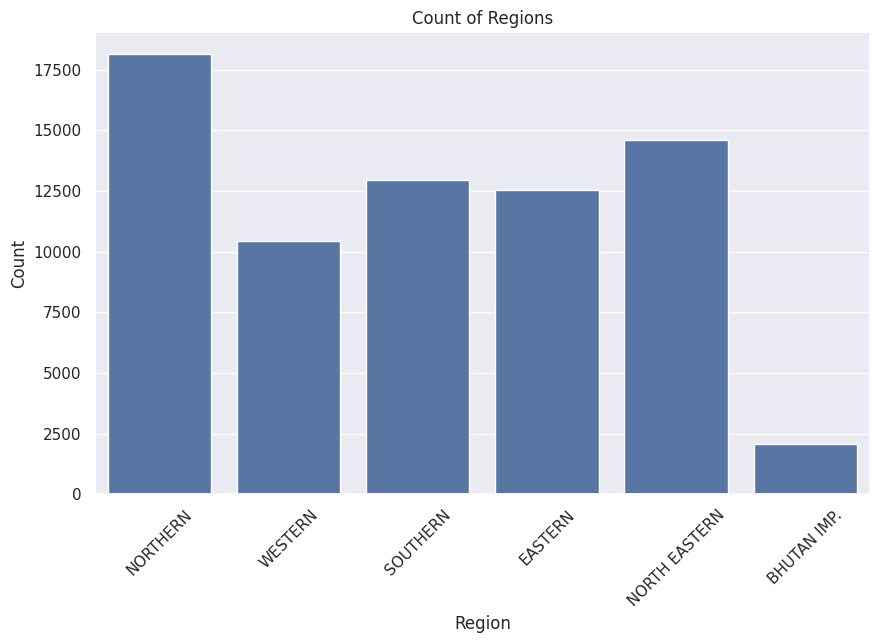

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot for Region DataFrame
plt.figure(figsize=(10, 6))
sns.countplot(x='Region', data=df)
plt.title('Count of Regions')
plt.xlabel('Region')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()
generation_col = "Generation / Today's Program"
region = pd.read_csv("/content/state.csv")
results = region.groupby("Region")[generation_col].sum()

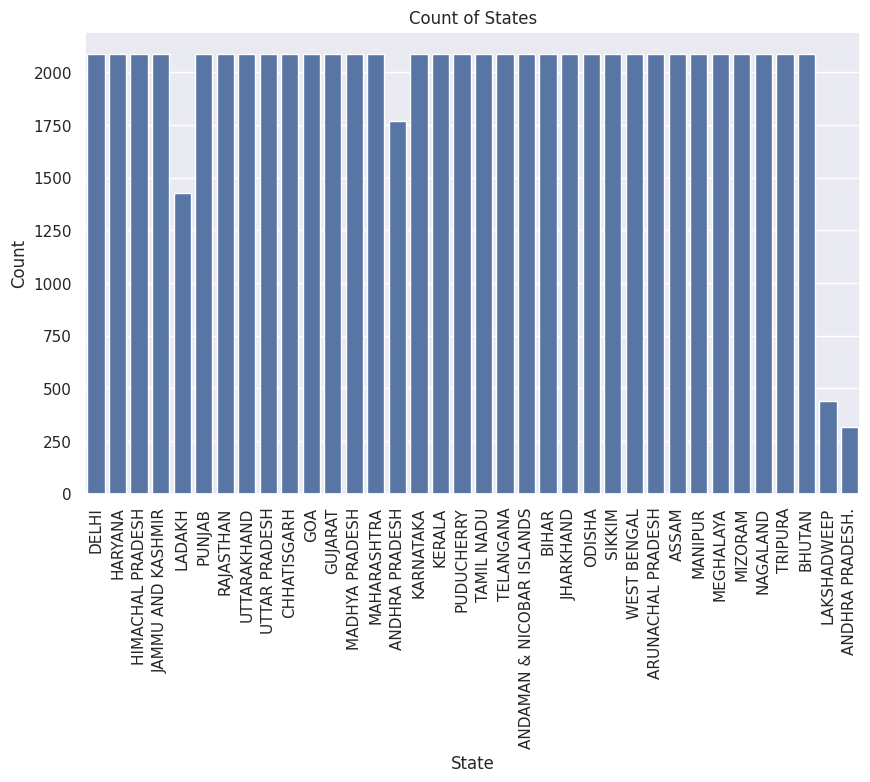

In [ ]:
# Plot for State DataFrame
plt.figure(figsize=(10, 6))
sns.countplot(x='State', data=df)
plt.title('Count of States')
plt.xlabel('State')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()


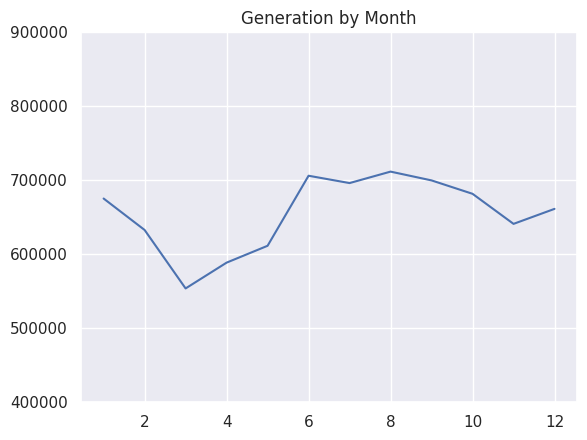

In [ ]:
# region.set_index(["Date"], inplace=True)
region["Date"] = pd.to_datetime(region.Date, format='%Y-%m-%d')

by_month = region.groupby(region.Date.dt.month)[generation_col].sum()
plt.title("Generation by Month")
plt.ylim((400000, 900000))
plt.plot(by_month.index, by_month.values)
plt.show()

In [ ]:
df_cleaned=df.drop(['Coal Stock in Days', 'Outage Date', 'Expected Date / Sync Date', 'Remarks'], axis=1)

In [ ]:
df_cleaned_state = df_cleaned.dropna(subset=['Monitored CAP in MW', 'Generation / Today\'s Program', 'Generation / Today\'s Actual', 'Generation / FY YTD Program', 'Generation / FY YTD Actual', 'CAP under outage'])

In [ ]:
print("Missing values in Power Station DataFrame:")
print(df_cleaned_state.isnull().sum())
print()

Missing values in Power Station DataFrame:
Region                          0
State                           0
Date                            0
Monitored CAP in MW             0
Generation / Today's Program    0
Generation / Today's Actual     0
Generation / FY YTD Program     0
Generation / FY YTD Actual      0
CAP under outage                0
dtype: int64



In [ ]:
df_cleaned_state.head()

,Region,State,Date,Monitored CAP in MW,Generation / Today's Program,Generation / Today's Actual,Generation / FY YTD Program,Generation / FY YTD Actual,CAP under outage
0,NORTHERN,DELHI,2020-11-17,2208.40,16.44,16.67,3737.56,3350.75,892.60
1,NORTHERN,HARYANA,2020-11-17,5761.59,63.11,0.00,15341.67,7346.04,5467.76
2,NORTHERN,HIMACHAL PRADESH,2020-11-17,9809.02,54.10,47.46,30336.70,31805.22,2129.00
3,NORTHERN,JAMMU AND KASHMIR,2020-11-17,3535.00,23.61,26.17,13835.37,13697.29,775.00
4,NORTHERN,LADAKH,2020-11-17,89.00,0.60,0.72,202.20,311.04,33.00


In [ ]:
# import pandas as pd
# from sklearn.preprocessing import MinMaxScaler

# # Data Transformation
# df_cleaned_state['Date'] = pd.to_datetime(df_cleaned_state['Date'])

# # Normalization
# scaler = MinMaxScaler()
# numerical_columns = ['Monitored CAP in MW', "Generation / Today's Program", "Generation / Today's Actual",
#                      "Generation / FY YTD Program", "Generation / FY YTD Actual", "CAP under outage"]
# station_df_normalized = df_cleaned_state.copy()
# station_df_normalized[numerical_columns] = scaler.fit_transform(station_df_normalized[numerical_columns])

# # Display the transformed and normalized DataFrame
# print(station_df_normalized)


In [ ]:
df_cleaned_state['Date'] = pd.to_datetime(df_cleaned['Date'])

# Extract year and month from the 'Date' column
df_cleaned_state['Year'] = df_cleaned_state['Date'].dt.year
df_cleaned_state['Month'] = df_cleaned_state['Date'].dt.month

grouped_data = df_cleaned_state.groupby('State')

# Printing the grouped data
#print(grouped_data)
for state, data in grouped_data:
    print(state)
    print(data)


<ipython-input-15-645bdea2373c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned_state['Date'] = pd.to_datetime(df_cleaned['Date'])
<ipython-input-15-645bdea2373c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned_state['Year'] = df_cleaned_state['Date'].dt.year
<ipython-input-15-645bdea2373c>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https:

ANDAMAN & NICOBAR ISLANDS
        Region                      State       Date  Monitored CAP in MW  \
20     EASTERN  ANDAMAN & NICOBAR ISLANDS 2020-11-17               40.048   
55     EASTERN  ANDAMAN & NICOBAR ISLANDS 2023-08-16               92.710   
89     EASTERN  ANDAMAN & NICOBAR ISLANDS 2022-09-21               40.048   
123    EASTERN  ANDAMAN & NICOBAR ISLANDS 2021-10-20               40.048   
158    EASTERN  ANDAMAN & NICOBAR ISLANDS 2023-01-26               92.710   
...        ...                        ...        ...                  ...   
70623  EASTERN  ANDAMAN & NICOBAR ISLANDS 2022-09-04               40.048   
70657  EASTERN  ANDAMAN & NICOBAR ISLANDS 2022-07-29               40.048   
70691  EASTERN  ANDAMAN & NICOBAR ISLANDS 2022-07-01               40.048   
70726  EASTERN  ANDAMAN & NICOBAR ISLANDS 2023-06-22               92.710   
70760  EASTERN  ANDAMAN & NICOBAR ISLANDS 2022-07-15               40.048   

       Generation / Today's Program  Generation /

In [ ]:

# # Group the data by 'State', 'Year', and 'Month'
# grouped_data_by_state_year_month = df_cleaned_state.groupby(['State', 'Year', 'Month'])

# # Calculate the average values for each group
# avg_values_by_state_year_month = grouped_data_by_state_year_month.mean().reset_index()

# avg_values_by_state_year_month['Year'] = avg_values_by_state_year_month['Year'].astype(int)
# avg_values_by_state_year_month['Month'] = avg_values_by_state_year_month['Month'].astype(int)

# # Display the resulting DataFrame
# print(avg_values_by_state_year_month)

In [ ]:
# import matplotlib.pyplot as plt

# # Get the unique states
# unique_states = df_cleaned_['State'].unique()

# # Set up subplots
# num_rows = (len(unique_states) + 1) // 2  # Calculate the number of rows for subplots
# fig, axes = plt.subplots(num_rows, 2, figsize=(15, 5 * num_rows))  # Create subplots

# # Iterate over unique states and plot
# for i, state in enumerate(unique_states):
#     # Filter data for the current state
#     state_data = avg_values_by_state_year_month[avg_values_by_state_year_month['State'] == state]

#     # Plot
#     row = i // 2
#     col = i % 2
#     ax = axes[row, col] if num_rows > 1 else axes[col]
#     ax.plot(state_data['Year'] + state_data['Month'] / 12, state_data['Monitored CAP in MW'], marker='o',linestyle='-.')
#     ax.set_title(state)
#     ax.set_xlabel('Year')
#     ax.set_ylabel('Monitored CAP in MW')

# # Adjust layout
# plt.tight_layout()

# # Show plots
# plt.show()


In [ ]:
# # # Assuming cleaning involves replacing non-numeric values with NaN
# df_cleaned_state[['Generation / Today\'s Program', 'Generation / Today\'s Actual']] = df_cleaned_state[['Generation / Today\'s Program', 'Generation / Today\'s Actual']].apply(pd.to_numeric, errors='coerce')

# # # Plotting for each state
# # for state in unique_states:
# #     # Filter data for the current state
# #     state_data = avg_data[avg_data['State'] == state]

# #     # Plot
# #     plt.figure(figsize=(10, 6))
# #     plt.plot(state_data['Year'] + state_data['Month'] / 12, state_data["Generation / Today's Program"], marker='o', linestyle='-.', color='blue', label="Generation / Today's Program")
# #     plt.plot(state_data['Year'] + state_data['Month'] / 12, state_data["Generation / Today's Actual"], marker='o', linestyle='-.', color='green', label="Generation / Today's Actual")
# #     plt.title(state)
# #     plt.xlabel('Year')
# #     plt.ylabel('Generation')
# #     plt.legend()
# #     plt.grid(True)
# #     plt.show()

# import matplotlib.pyplot as plt

# # Assuming you have already defined 'df_cleaned_state' and 'unique_states'

# # Grouping data by State, Year, and Month
# grouped_data = df_cleaned_state.groupby(['State', 'Year', 'Month'])

# # Calculating the average for each year
# avg_data = grouped_data.mean().reset_index()

# # Plotting for each state
# for state in unique_states:
#     # Filter data for the current state
#     state_data = avg_data[avg_data['State'] == state]

#     # Plot
#     plt.figure(figsize=(10, 6))
#     plt.plot(state_data['Year'] + state_data['Month'] / 12, state_data["Generation / Today's Program"], marker='o', linestyle='-.', color='blue', label="Generation / Today's Program")
#     plt.plot(state_data['Year'] + state_data['Month'] / 12, state_data["Generation / Today's Actual"], marker='o', linestyle='-.', color='green', label="Generation / Today's Actual")
#     plt.title(state)
#     plt.xlabel('Year')
#     plt.ylabel('Generation')
#     plt.legend()
#     plt.grid(True)
#     plt.show()



In [ ]:
# import matplotlib.pyplot as plt

# # Grouping data by State, Year, and Month
# grouped_data = df_cleaned_state.groupby(['State', 'Year', 'Month'])

# # Calculating the average for each year
# avg_data = grouped_data.mean().reset_index()

# # Plotting for each state
# for state in unique_states:
#     # Filter data for the current state
#     state_data = avg_data[avg_data['State'] == state]

#     # Plot
#     plt.figure(figsize=(10, 6))
#     plt.plot(state_data['Year'] + state_data['Month'] / 12, state_data["Generation / Today's Program"], marker='o', linestyle='-.', color='blue', label="Generation / Today's Program")
#     plt.plot(state_data['Year'] + state_data['Month'] / 12, state_data["Generation / Today's Actual"], marker='o', linestyle='-.', color='green', label="Generation / Today's Actual")
#     plt.title(state)
#     plt.xlabel('Year')
#     plt.ylabel('Generation')
#     plt.legend()
#     plt.grid(True)
#     plt.show()



In [ ]:
# import matplotlib.pyplot as plt

# # Data
# years_months = [f"{row['Year']}-{row['Month']}" for _, row in df_monthly.iterrows()]
# monitored_cap = df_monthly['Monitored CAP in MW']

# # Plotting
# plt.figure(figsize=(12, 6))
# plt.bar(years_months, monitored_cap, color='skyblue')
# plt.ylim(8000, 8600)  # Set y-axis limit from 8000 to 9000
# plt.xlabel('Year-Month')
# plt.ylabel('Monitored Capacity in MW')
# plt.title('Monitored Capacity in MW by Year-Month for INDIA')
# plt.xticks(rotation=45, ha='right')
# plt.tight_layout()
# plt.show()



In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Data Transformation
# df_cleaned_station['Date'] = pd.to_datetime(df_cleaned_station['Date'])

# Normalization
scaler = MinMaxScaler()
numerical_columns = ['Monitored CAP in MW', "Generation / Today's Program", "Generation / Today's Actual",
                     "Generation / FY YTD Program", "Generation / FY YTD Actual", "CAP under outage"]
state_df_normalized = df_cleaned_state.copy()
state_df_normalized[numerical_columns] = scaler.fit_transform(state_df_normalized[numerical_columns])

# Display the transformed and normalized DataFrame
print(state_df_normalized)


              Region              State       Date  Monitored CAP in MW  \
0           NORTHERN              DELHI 2020-11-17             0.065844   
1           NORTHERN            HARYANA 2020-11-17             0.171782   
2           NORTHERN   HIMACHAL PRADESH 2020-11-17             0.292457   
3           NORTHERN  JAMMU AND KASHMIR 2020-11-17             0.105396   
4           NORTHERN             LADAKH 2020-11-17             0.002654   
...              ...                ...        ...                  ...   
70769  NORTH EASTERN          MEGHALAYA 2022-07-15             0.009600   
70770  NORTH EASTERN            MIZORAM 2022-07-15             0.001789   
70771  NORTH EASTERN           NAGALAND 2022-07-15             0.002236   
70772  NORTH EASTERN            TRIPURA 2022-07-15             0.032785   
70773    BHUTAN IMP.             BHUTAN 2022-07-15             0.000000   

       Generation / Today's Program  Generation / Today's Actual  \
0                          0.03

In [ ]:
from sklearn.model_selection import train_test_split

# Splitting the dataset into features (X) and target variable (y)
X = state_df_normalized.drop('Region', axis=1)  # Features
y = state_df_normalized['Region']  # Target variable

# Splitting the dataset into 80% training and 20% testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Displaying the shapes of the training and testing sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)


Shape of X_train: (56358, 10)
Shape of X_test: (14090, 10)
Shape of y_train: (56358,)
Shape of y_test: (14090,)


In [ ]:
print(state_df_normalized)

              Region              State       Date  Monitored CAP in MW  \
0           NORTHERN              DELHI 2020-11-17             0.065844   
1           NORTHERN            HARYANA 2020-11-17             0.171782   
2           NORTHERN   HIMACHAL PRADESH 2020-11-17             0.292457   
3           NORTHERN  JAMMU AND KASHMIR 2020-11-17             0.105396   
4           NORTHERN             LADAKH 2020-11-17             0.002654   
...              ...                ...        ...                  ...   
70769  NORTH EASTERN          MEGHALAYA 2022-07-15             0.009600   
70770  NORTH EASTERN            MIZORAM 2022-07-15             0.001789   
70771  NORTH EASTERN           NAGALAND 2022-07-15             0.002236   
70772  NORTH EASTERN            TRIPURA 2022-07-15             0.032785   
70773    BHUTAN IMP.             BHUTAN 2022-07-15             0.000000   

       Generation / Today's Program  Generation / Today's Actual  \
0                          0.03

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Assuming 'Date' is the name of the datetime column in your dataset
state_df_normalized['Date'] = pd.to_datetime(state_df_normalized['Date'])

# Create new features for year and month
state_df_normalized['year'] = state_df_normalized['Date'].dt.year
state_df_normalized['month'] = state_df_normalized['Date'].dt.month
# Add more features as needed (e.g., day, hour, minute, etc.)

# Drop non-numeric and unnecessary columns
state_df_numeric = state_df_normalized.drop(columns=['Region', 'State', 'Date'])

# Now you can proceed to scale the numeric features using MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled_station = scaler.fit_transform(state_df_numeric)

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply LabelEncoder to categorical columns
categorical_columns = ['Region', 'State']
for col in categorical_columns:
    state_df_normalized[col] = label_encoder.fit_transform(state_df_normalized[col])

In [ ]:
# Splitting the dataset into features (X) and target variable (y)
X_state = state_df_normalized.drop('Region', axis=1)  # Features
y_state = state_df_normalized['Region']  # Target variable

# Splitting the dataset into 80% training and 20% testing sets
X_train_state, X_test_state, y_train_encoded_state, y_test_encoded_state = train_test_split(X_state, y_state, test_size=0.2, random_state=42)

**FNN REGRESSION**(1 22min)

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Assuming you have imported the necessary libraries and have the dataset loaded into 'state_df_normalized'

# Assuming 'Date' is the name of the datetime column in your dataset
state_df_normalized['Date'] = pd.to_datetime(state_df_normalized['Date'])

# Create new features for year and month
state_df_normalized['year'] = state_df_normalized['Date'].dt.year
state_df_normalized['month'] = state_df_normalized['Date'].dt.month

# Drop non-numeric and unnecessary columns
state_df_numeric = state_df_normalized.drop(columns=['Region', 'State', 'Date'])

# Splitting the dataset into features (X) and target variable (y)
X = state_df_numeric.drop(['Generation / Today\'s Actual'], axis=1)  # Features
y = state_df_numeric['Generation / Today\'s Actual']  # Target variable

# Splitting the dataset into 80% training and 20% testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the features using MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the FNN model
model_fnn = Sequential()
model_fnn.add(Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)))
model_fnn.add(Dropout(0.2))
model_fnn.add(Dense(64, activation='relu'))
model_fnn.add(Dropout(0.2))
model_fnn.add(Dense(1, activation='linear'))  # Output layer for regression task

model_fnn.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Train the model
history_fnn = model_fnn.fit(X_train_scaled, y_train, epochs=10, batch_size=32, validation_data=(X_test_scaled, y_test), verbose=1)




Epoch 1/10
1762/1762 [==============================] - 9s 4ms/step - loss: 0.0035 - mae: 0.0380 - val_loss: 7.6325e-04 - val_mae: 0.0181
Epoch 2/10
1762/1762 [==============================] - 6s 4ms/step - loss: 0.0017 - mae: 0.0282 - val_loss: 7.2544e-04 - val_mae: 0.0184
Epoch 3/10
1762/1762 [==============================] - 5s 3ms/step - loss: 0.0015 - mae: 0.0269 - val_loss: 7.0039e-04 - val_mae: 0.0195
Epoch 4/10
1762/1762 [==============================] - 8s 5ms/step - loss: 0.0014 - mae: 0.0263 - val_loss: 6.7325e-04 - val_mae: 0.0182
Epoch 5/10
1762/1762 [==============================] - 5s 3ms/step - loss: 0.0014 - mae: 0.0263 - val_loss: 6.3275e-04 - val_mae: 0.0178
Epoch 6/10
1762/1762 [==============================] - 6s 4ms/step - loss: 0.0013 - mae: 0.0258 - val_loss: 5.4422e-04 - val_mae: 0.0149
Epoch 7/10
1762/1762 [==============================] - 4s 2ms/step - loss: 0.0013 - mae: 0.0253 - val_loss: 5.6796e-04 - val_mae: 0.0152
Epoch 8/10
1762/1762 [============

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
y_pred = model_fnn.predict(X_test_scaled)
# Calculate mean squared error (MSE) and mean absolute error (MAE)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)

r2 = r2_score(y_test, y_pred)
print("R-squared (R2) Score:", r2)
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)

441/441 [==============================] - 1s 3ms/step
Mean Squared Error (MSE): 0.0006702206558258316
Mean Absolute Error (MAE): 0.017431089788377117
R-squared (R2) Score: 0.985766198830763
Root Mean Squared Error (RMSE): 0.025888620199343022


**CNN**(3 min)

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

# Assuming 'station_df_numeric' contains your dataset and 'Generation / Today's Actual' is the target variable
# Replace these with your actual dataset and target variable
# station_df_numeric = pd.read_csv('your_dataset.csv')

# Splitting the dataset into features (X) and target variable (y)
X = state_df_numeric.drop(['Generation / Today\'s Actual'], axis=1)  # Features
y = state_df_numeric['Generation / Today\'s Actual']  # Target variable

# Splitting the dataset into 80% training and 20% testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the features using MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reshape the input data for CNN
X_train_reshaped = X_train_scaled.reshape((X_train_scaled.shape[0], X_train_scaled.shape[1], 1))
X_test_reshaped = X_test_scaled.reshape((X_test_scaled.shape[0], X_test_scaled.shape[1], 1))

# Define the CNN model for regression
model_cnn = Sequential()
model_cnn.add(Conv1D(64, kernel_size=2, activation='relu', input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])))
model_cnn.add(MaxPooling1D(pool_size=2))
model_cnn.add(Conv1D(32, kernel_size=2, activation='relu'))
model_cnn.add(MaxPooling1D(pool_size=2))
model_cnn.add(Flatten())
model_cnn.add(Dense(128, activation='relu'))
model_cnn.add(Dropout(0.2))
model_cnn.add(Dense(1, activation='linear'))  # Output layer for regression with linear activation

# Compile the CNN model for regression
model_cnn.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae', 'mse'])  # Using MSE for regression

# Define callbacks for monitoring during training
checkpoint_cnn = ModelCheckpoint('cnn_model.h5', monitor='val_loss', save_best_only=True, verbose=1)
early_stopping_cnn = EarlyStopping(monitor='val_loss', patience=10, verbose=1)
reduce_lr_cnn = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, verbose=1)

# Train the CNN model for regression
history_cnn = model_cnn.fit(X_train_reshaped, y_train, epochs=20, batch_size=32, validation_split=0.2, callbacks=[checkpoint_cnn, early_stopping_cnn, reduce_lr_cnn])



Epoch 1/20
1408/1409 [============================>.] - ETA: 0s - loss: 0.0021 - mae: 0.0286 - mse: 0.0021
Epoch 1: val_loss improved from inf to 0.00083, saving model to cnn_model.h5
1409/1409 [==============================] - 12s 6ms/step - loss: 0.0021 - mae: 0.0286 - mse: 0.0021 - val_loss: 8.3318e-04 - val_mae: 0.0185 - val_mse: 8.3318e-04 - lr: 0.0010
Epoch 2/20
  20/1409 [..............................] - ETA: 7s - loss: 0.0015 - mae: 0.0249 - mse: 0.0015

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1408/1409 [============================>.] - ETA: 0s - loss: 0.0012 - mae: 0.0231 - mse: 0.0012
Epoch 2: val_loss did not improve from 0.00083
1409/1409 [==============================] - 7s 5ms/step - loss: 0.0012 - mae: 0.0231 - mse: 0.0012 - val_loss: 0.0012 - val_mae: 0.0239 - val_mse: 0.0012 - lr: 0.0010
Epoch 3/20
1401/1409 [============================>.] - ETA: 0s - loss: 0.0011 - mae: 0.0226 - mse: 0.0011
Epoch 3: val_loss did not improve from 0.00083
1409/1409 [==============================] - 6s 5ms/step - loss: 0.0011 - mae: 0.0226 - mse: 0.0011 - val_loss: 8.4619e-04 - val_mae: 0.0193 - val_mse: 8.4619e-04 - lr: 0.0010
Epoch 4/20
1406/1409 [============================>.] - ETA: 0s - loss: 0.0011 - mae: 0.0225 - mse: 0.0011
Epoch 4: val_loss improved from 0.00083 to 0.00066, saving model to cnn_model.h5
1409/1409 [==============================] - 11s 8ms/step - loss: 0.0011 - mae: 0.0225 - mse: 0.0011 - val_loss: 6.6077e-04 - val_mae: 0.0168 - val_mse: 6.6077e-04 - lr: 0

In [ ]:
# Evaluate the CNN model on test data
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
test_loss_cnn, test_mae_cnn, test_mse_cnn = model_cnn.evaluate(X_test_reshaped, y_test)
print("CNN Test Loss:", test_loss_cnn)
print("CNN Test Mean Absolute Error (MAE):", test_mae_cnn)
print("CNN Test Mean Squared Error (MSE):", test_mse_cnn)
# Assuming your CNN model is named model_cnn and you have test data X_test_reshaped
y_pred_cnn = model_cnn.predict(X_test_reshaped)

# Now you can use y_pred_cnn in the mean_squared_error and mean_absolute_error functions
mse_cnn = mean_squared_error(y_test, y_pred_cnn)
mae_cnn = mean_absolute_error(y_test, y_pred_cnn)

print("CNN Mean Squared Error (MSE):", mse_cnn)
print("CNN Mean Absolute Error (MAE):", mae_cnn)

# Calculate R-squared (R2) Score and Root Mean Squared Error (RMSE) for CNN
r2_cnn = r2_score(y_test, y_pred_cnn)
rmse_cnn = np.sqrt(mse_cnn)

print("CNN R-squared (R2) Score:", r2_cnn)
print("CNN Root Mean Squared Error (RMSE):", rmse_cnn)

441/441 [==============================] - 3s 5ms/step - loss: 4.8211e-04 - mae: 0.0138 - mse: 4.8211e-04
CNN Test Loss: 0.00048210652312263846
CNN Test Mean Absolute Error (MAE): 0.013796643353998661
CNN Test Mean Squared Error (MSE): 0.00048210652312263846
441/441 [==============================] - 2s 3ms/step
CNN Mean Squared Error (MSE): 0.0004821063107983674
CNN Mean Absolute Error (MAE): 0.013796634420467113
CNN R-squared (R2) Score: 0.9897612744240434
CNN Root Mean Squared Error (RMSE): 0.02195691942869872


**SVM**(5 sec)

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Splitting the dataset into features (X) and target variable (y)
X = state_df_numeric.drop(['Generation / Today\'s Actual'], axis=1)  # Features
y = state_df_numeric['Generation / Today\'s Actual']  # Target variable

# Splitting the dataset into 80% training and 20% testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the features using MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define and train the SVM model
svm_model = SVR(kernel='linear')  # Linear kernel for regression
svm_model.fit(X_train_scaled, y_train)

# Evaluate the SVM model on test data
y_pred_svm = svm_model.predict(X_test_scaled)

# Calculate evaluation metrics
mse_svm = mean_squared_error(y_test, y_pred_svm)
mae_svm = mean_absolute_error(y_test, y_pred_svm)
accuracy_svm = svm_model.score(X_test_scaled, y_test)  # Accuracy score for regression models

In [ ]:
# Print the evaluation metrics
print("SVM Mean Squared Error (MSE):", mse_svm)
print("SVM Mean Absolute Error (MAE):", mae_svm)
print("SVM Accuracy Score:", accuracy_svm)

# Calculate mean squared error (MSE) and mean absolute error (MAE) for SVM
mse_svm = mean_squared_error(y_test, y_pred_svm)
mae_svm = mean_absolute_error(y_test, y_pred_svm)

print("SVM Mean Squared Error (MSE):", mse_svm)
print("SVM Mean Absolute Error (MAE):", mae_svm)

# Calculate R-squared (R2) Score and Root Mean Squared Error (RMSE) for SVM
r2_svm = r2_score(y_test, y_pred_svm)
rmse_svm = np.sqrt(mse_svm)

print("SVM R-squared (R2) Score:", r2_svm)
print("SVM Root Mean Squared Error (RMSE):", rmse_svm)


SVM Mean Squared Error (MSE): 0.0012364050427519325
SVM Mean Absolute Error (MAE): 0.029305222568619668
SVM Accuracy Score: 0.9737418663686392
SVM Mean Squared Error (MSE): 0.0012364050427519325
SVM Mean Absolute Error (MAE): 0.029305222568619668
SVM R-squared (R2) Score: 0.9737418663686392
SVM Root Mean Squared Error (RMSE): 0.035162551709907695


--------------------------------------------------------------------------------------------------------------------------

**Random forest**(44 sec)

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Splitting the dataset into features (X) and target variable (y)
X = state_df_numeric.drop(['Generation / Today\'s Actual'], axis=1)  # Features
y = state_df_numeric['Generation / Today\'s Actual']  # Target variable

# Splitting the dataset into 80% training and 20% testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Regressor model
model_rf = RandomForestRegressor(random_state=42)

# Train the model
model_rf.fit(X_train, y_train)

# Predict on test data
y_pred_rf = model_rf.predict(X_test)

In [ ]:
# Calculate Mean Squared Error (MSE) and Mean Absolute Error (MAE) for Random Forest
mse_rf = mean_squared_error(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)

print("Random Forest Mean Squared Error (MSE):", mse_rf)
print("Random Forest Mean Absolute Error (MAE):", mae_rf)

# Calculate R-squared (R2) Score and Root Mean Squared Error (RMSE) for Random Forest
r2_rf = r2_score(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)

print("Random Forest R-squared (R2) Score:", r2_rf)
print("Random Forest Root Mean Squared Error (RMSE):", rmse_rf)

Random Forest Mean Squared Error (MSE): 0.00018627632136968176
Random Forest Mean Absolute Error (MAE): 0.007217473663099623
Random Forest R-squared (R2) Score: 0.9960439594067033
Random Forest Root Mean Squared Error (RMSE): 0.013648308370258995


**GBM**(4 sec)

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Assuming 'station_df_numeric' contains your dataset and 'Generation / Today's Actual' is the target variable
# Replace these with your actual dataset and target variable
# station_df_numeric = pd.read_csv('your_dataset.csv')

# Splitting the dataset into features (X) and target variable (y)
X = state_df_numeric.drop(['Generation / Today\'s Actual'], axis=1)  # Features
y = state_df_numeric['Generation / Today\'s Actual']  # Target variable

# Splitting the dataset into 80% training and 20% testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the XGBoost Regressor model
model_xgb = XGBRegressor(random_state=42)

# Train the model
model_xgb.fit(X_train, y_train)

# Predict on test data
y_pred_xgb = model_xgb.predict(X_test)


In [ ]:
# Calculate Mean Squared Error (MSE) and Mean Absolute Error (MAE) for XGBoost
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)

print("XGBoost Mean Squared Error (MSE):", mse_xgb)
print("XGBoost Mean Absolute Error (MAE):", mae_xgb)

# Calculate R-squared (R2) Score and Root Mean Squared Error (RMSE) for XGBoost
r2_xgb = r2_score(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mse_xgb)

print("XGBoost R-squared (R2) Score:", r2_xgb)
print("XGBoost Root Mean Squared Error (RMSE):", rmse_xgb)

XGBoost Mean Squared Error (MSE): 0.00024548017367644135
XGBoost Mean Absolute Error (MAE): 0.009364104193057606
XGBoost R-squared (R2) Score: 0.9947866184774702
XGBoost Root Mean Squared Error (RMSE): 0.01566780691980985


**LSTM1**(3 36 min)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Encode categorical columns
label_encoder = LabelEncoder()
categorical_columns = ['Region', 'State']
for col in categorical_columns:
    state_df_normalized[col] = label_encoder.fit_transform(state_df_normalized[col])

# Assuming 'Region' is the target variable
X_state = state_df_normalized.drop(['Region', 'Date'], axis=1)
y_state = state_df_normalized['Region']

# Encoding the target variable
label_encoder_state = LabelEncoder()
y_encoded_state = label_encoder_state.fit_transform(y_state)

# Train-test split
X_train_state, X_test_state, y_train_state, y_test_state = train_test_split(X_state, y_state, test_size=0.2, random_state=42)

# Scaling features
scaler_state = MinMaxScaler()
X_train_scaled_state = scaler_state.fit_transform(X_train_state)
X_test_scaled_state = scaler_state.transform(X_test_state)

# Reshape the input data for LSTM
X_train_reshaped_state= X_train_scaled_state.reshape((X_train_scaled_state.shape[0], 1, X_train_scaled_state.shape[1]))
X_test_reshaped_state = X_test_scaled_state.reshape((X_test_scaled_state.shape[0], 1, X_test_scaled_state.shape[1]))

# Define the LSTM model
model_state = Sequential()
model_state.add(LSTM(50, input_shape=(X_train_reshaped_state.shape[1], X_train_reshaped_state.shape[2])))
model_state.add(Dense(len(label_encoder.classes_), activation='softmax'))  # Output layer with softmax activation for multi-class classification

# Compile the model
model_state.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history_state = model_state.fit(X_train_reshaped_state, y_train_encoded_state, epochs=20, batch_size=32, validation_data=(X_test_reshaped_state, y_test_encoded_state), verbose=1)

Epoch 1/20
1762/1762 [==============================] - 11s 4ms/step - loss: 1.4251 - accuracy: 0.4821 - val_loss: 1.1500 - val_accuracy: 0.5408
Epoch 2/20
1762/1762 [==============================] - 8s 5ms/step - loss: 1.0613 - accuracy: 0.5999 - val_loss: 0.9644 - val_accuracy: 0.6355
Epoch 3/20
1762/1762 [==============================] - 7s 4ms/step - loss: 0.9045 - accuracy: 0.6407 - val_loss: 0.8267 - val_accuracy: 0.6626
Epoch 4/20
1762/1762 [==============================] - 8s 4ms/step - loss: 0.7769 - accuracy: 0.6845 - val_loss: 0.7095 - val_accuracy: 0.7344
Epoch 5/20
1762/1762 [==============================] - 8s 5ms/step - loss: 0.6771 - accuracy: 0.7362 - val_loss: 0.6264 - val_accuracy: 0.7784
Epoch 6/20
1762/1762 [==============================] - 8s 5ms/step - loss: 0.6070 - accuracy: 0.7753 - val_loss: 0.5684 - val_accuracy: 0.7997
Epoch 7/20
1762/1762 [==============================] - 11s 6ms/step - loss: 0.5539 - accuracy: 0.7917 - val_loss: 0.5187 - val_accurac

**LSTM2**(3 23 sec)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Encode categorical columns
label_encoder = LabelEncoder()
categorical_columns = ['Region', 'State']
for col in categorical_columns:
    state_df_normalized[col] = label_encoder.fit_transform(state_df_normalized[col])

# Splitting the dataset into features (X) and target variable (y)
X_state = state_df_normalized.drop(['Region', 'Date'], axis=1)  # Features
y_state = state_df_normalized['Region']  # Target variable

# Splitting the dataset into 80% training and 20% testing sets
X_train_state, X_test_state, y_train_encoded_state, y_test_encoded_state = train_test_split(X_state, y_state, test_size=0.2, random_state=42)

# Normalize the features using MinMaxScaler
scaler_state = MinMaxScaler()
X_train_scaled_state = scaler_state.fit_transform(X_train_state)
X_test_scaled_state = scaler_state.transform(X_test_state)

# Reshape the input data for LSTM
X_train_reshaped_state = X_train_scaled_state.reshape((X_train_scaled_state.shape[0], 1, X_train_scaled_state.shape[1]))
X_test_reshaped_state = X_test_scaled_state.reshape((X_test_scaled_state.shape[0], 1, X_test_scaled_state.shape[1]))

# Define the LSTM model
model_state = Sequential()
model_state.add(LSTM(128, return_sequences=True, input_shape=(X_train_reshaped_state.shape[1], X_train_reshaped_state.shape[2])))
model_state.add(Dropout(0.2))
model_state.add(LSTM(64, return_sequences=False))
model_state.add(Dropout(0.2))
model_state.add(Dense(len(label_encoder.classes_), activation='softmax'))  # Output layer with softmax activation for multi-class classification

# Compile the model
model_state.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history_state = model_state.fit(X_train_reshaped_state, y_train_encoded_state, epochs=10, batch_size=32, validation_data=(X_test_reshaped_state, y_test_encoded_state), verbose=1)

Epoch 1/10
1762/1762 [==============================] - 24s 12ms/step - loss: 1.2290 - accuracy: 0.5225 - val_loss: 0.7817 - val_accuracy: 0.6946
Epoch 2/10
1762/1762 [==============================] - 18s 10ms/step - loss: 0.5956 - accuracy: 0.7675 - val_loss: 0.3177 - val_accuracy: 0.9028
Epoch 3/10
1762/1762 [==============================] - 20s 11ms/step - loss: 0.3367 - accuracy: 0.8739 - val_loss: 0.1730 - val_accuracy: 0.9337
Epoch 4/10
1762/1762 [==============================] - 29s 16ms/step - loss: 0.2264 - accuracy: 0.9172 - val_loss: 0.1113 - val_accuracy: 0.9529
Epoch 5/10
1762/1762 [==============================] - 16s 9ms/step - loss: 0.1669 - accuracy: 0.9391 - val_loss: 0.0691 - val_accuracy: 0.9753
Epoch 6/10
1762/1762 [==============================] - 20s 12ms/step - loss: 0.1337 - accuracy: 0.9508 - val_loss: 0.0537 - val_accuracy: 0.9791
Epoch 7/10
1762/1762 [==============================] - 16s 9ms/step - loss: 0.1108 - accuracy: 0.9584 - val_loss: 0.0424 - v

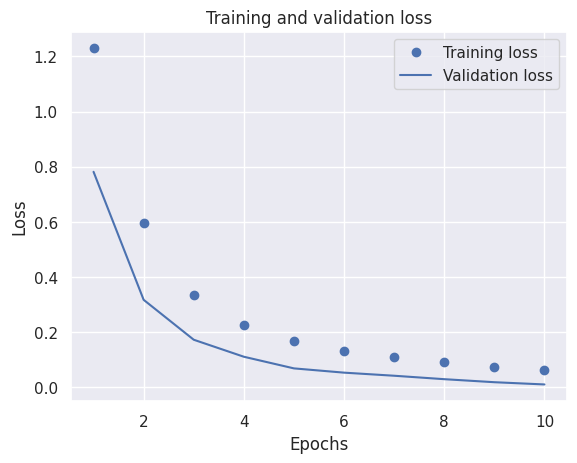

In [ ]:
import matplotlib.pyplot as plt

# Extract loss and accuracy from history
train_loss = history_state.history['loss']
val_loss = history_state.history['val_loss']
epochs = range(1, len(train_loss) + 1)

# Plotting loss
plt.plot(epochs, train_loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()



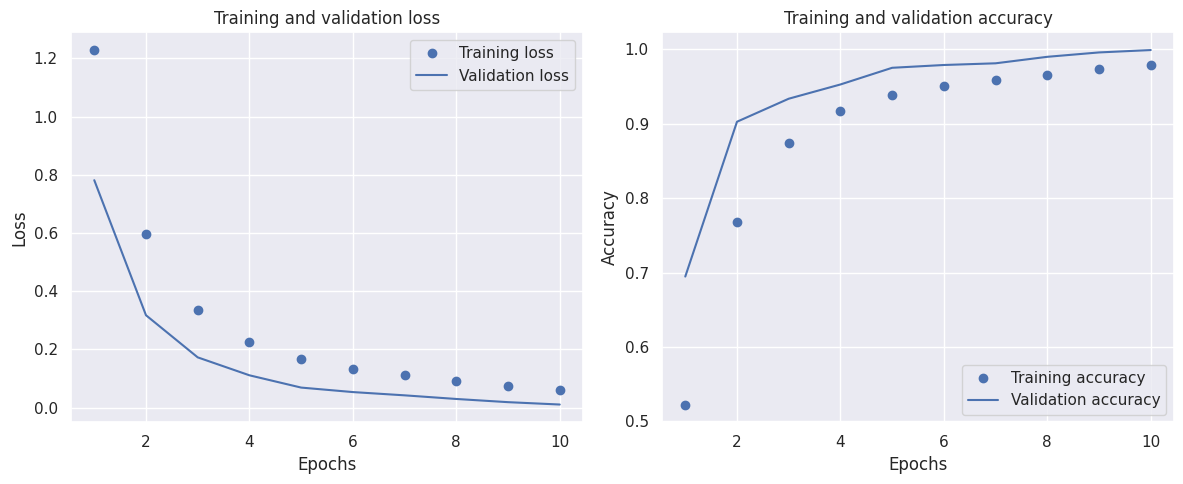

In [ ]:
import matplotlib.pyplot as plt

# Extract loss and accuracy from history
train_loss = history_state.history['loss']
val_loss = history_state.history['val_loss']
train_acc = history_state.history['accuracy']
val_acc = history_state.history['val_accuracy']
epochs = range(1, len(train_loss) + 1)

# Plotting loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plotting accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, train_acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

441/441 [==============================] - 3s 4ms/step
Accuracy: 0.9786188006401062
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       416
           1       1.00      1.00      1.00      2493
           2       1.00      1.00      1.00      2977
           3       1.00      1.00      1.00      3625
           4       1.00      1.00      1.00      2501
           5       1.00      1.00      1.00      2078
           6       0.00      0.00      0.00         0
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0
           9       0.00      0.00      0.00         0
          10       0.00      0.00      0.00         0
          11       0.00      0.00      0.00         0
          12       0.00      0.00      0.00         0
          13       0.00      0.00      0.00         0
          14       0.00      0.00      0.00         0
          15       0.00     

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

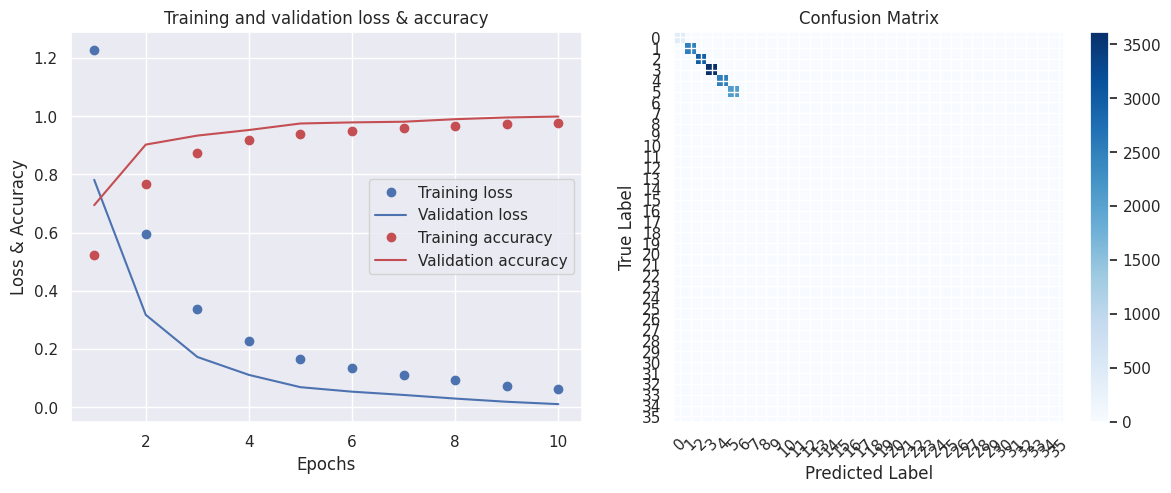

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

# Get probabilities for each class
probabilities = model_state.predict(X_test_reshaped_state)

# Get the predicted class for each sample
y_pred = np.argmax(probabilities, axis=1)

# Convert encoded labels back to original labels
y_test_original = label_encoder.inverse_transform(y_test_encoded_state)
y_pred_original = label_encoder.inverse_transform(y_pred)

# Accuracy
accuracy = history_state.history['accuracy'][-1]
print("Accuracy:", accuracy)

# Loss and Accuracy in one graph
epochs = range(1, len(history_state.history['loss']) + 1)
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, history_state.history['loss'], 'bo', label='Training loss')
plt.plot(epochs, history_state.history['val_loss'], 'b', label='Validation loss')
plt.plot(epochs, history_state.history['accuracy'], 'ro', label='Training accuracy')
plt.plot(epochs, history_state.history['val_accuracy'], 'r', label='Validation accuracy')
plt.title('Training and validation loss & accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss & Accuracy')
plt.legend()

# Confusion Matrix
conf_matrix = confusion_matrix(y_test_original, y_pred_original, labels=label_encoder.classes_)
plt.subplot(1, 2, 2)
plt.imshow(conf_matrix, cmap='Blues', interpolation='nearest')
plt.colorbar()
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.xticks(ticks=np.arange(len(label_encoder.classes_)), labels=label_encoder.classes_, rotation=45)
plt.yticks(ticks=np.arange(len(label_encoder.classes_)), labels=label_encoder.classes_)
plt.tight_layout()

# Convert the classes array to a list of strings
class_names = [str(c) for c in label_encoder.classes_]

# Classification Report
print("Classification Report:")
print(classification_report(y_test_original, y_pred_original, labels=label_encoder.transform(label_encoder.classes_), target_names=class_names))

plt.show()

In [ ]:
# Evaluate the model
loss, accuracy = model_state.evaluate(X_test_reshaped_state, y_test_encoded_state, verbose=0)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)


Test Loss: 0.010862910188734531
Test Accuracy: 0.9991483092308044


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       416
           1       1.00      1.00      1.00      2493
           2       1.00      1.00      1.00      2977
           3       1.00      1.00      1.00      3625
           4       1.00      1.00      1.00      2501
           5       1.00      1.00      1.00      2078

    accuracy                           1.00     14090
   macro avg       1.00      1.00      1.00     14090
weighted avg       1.00      1.00      1.00     14090

Confusion Matrix:
[[ 416    0    0    0    0    0]
 [   0 2492    0    1    0    0]
 [   0    0 2977    0    0    0]
 [   0   11    0 3614    0    0]
 [   0    0    0    0 2501    0]
 [   0    0    0    0    0 2078]]


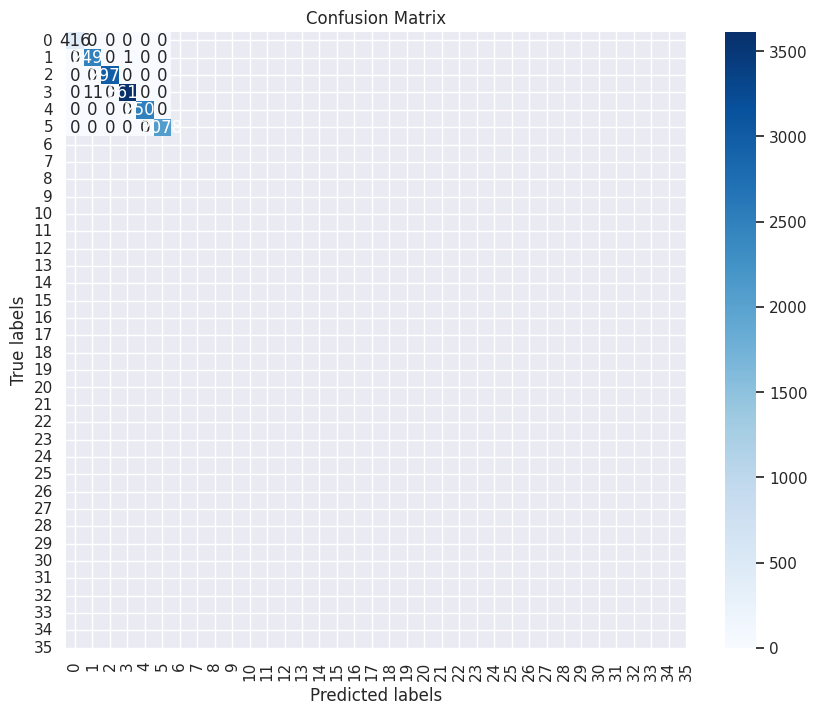

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Generate classification report
print("Classification Report:")
print(classification_report(y_test_original, y_pred_original))

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test_original, y_pred_original)
print("Confusion Matrix:")
print(conf_matrix)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


<Figure size 1000x600 with 0 Axes>

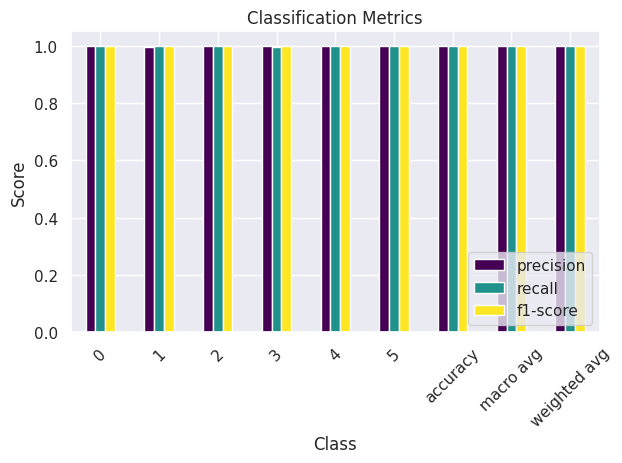

In [ ]:
from sklearn.metrics import classification_report

# Generate classification report
classification_rep = classification_report(y_test_original, y_pred_original, output_dict=True)

# Convert classification report to DataFrame
import pandas as pd
classification_df = pd.DataFrame(classification_rep).transpose()

# Plot precision, recall, and F1-score
plt.figure(figsize=(10, 6))
classification_df[['precision', 'recall', 'f1-score']].plot(kind='bar', colormap='viridis')
plt.title('Classification Metrics')
plt.xlabel('Class')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()


---------------------

In [ ]:
# Step 3: Make predictions for each state
predicted_values = {}
for state, model in models.items():
    data = state_datasets[state][['Month', 'Year','Generation / Today\'s Actual']]
    X_test = data.iloc[-100:]  # Assuming you want to predict the last 100 records

    # Normalize the test data using the same scaler as during training
    X_test_scaled = sc.transform(X_test)

    # Prepare the test data similar to the training data
    X_test_final = []
    for i in range(60, X_test_scaled.shape[0]):
        X_test_final.append(X_test_scaled[i-60:i, :-1])
    X_test_final = np.array(X_test_final)

    # Reshape the test data to match the input shape expected by the model
    X_test_final = np.reshape(X_test_final, (X_test_final.shape[0], X_test_final.shape[1], X_test_final.shape[2]))

    # Predict the values
    predicted_values[state] = model.predict(X_test_final)

# Step 4: Create new datasets with predicted values
# Step 4: Create new datasets with predicted values
new_datasets = {}

# Iterate through each state
for state, data in state_datasets.items():
    predicted = predicted_values[state]
    # Inverse transform the predicted values
    predicted_unscaled = sc.inverse_transform(np.concatenate((np.zeros((predicted.shape[0], 2)), predicted), axis=1))[:, -1]

    # Create a DataFrame to hold predicted values for the current state
    new_data_state = data.iloc[-100:].copy()
    new_data_state['Predicted Generation / Today\'s Actual'] = np.nan  # Initialize with NaNs

    # Assign the predicted values to the DataFrame
    new_data_state.loc[new_data_state.index[-predicted_unscaled.shape[0]:], 'Predicted Generation / Today\'s Actual'] = predicted_unscaled

    # Store the DataFrame for the current state in the dictionary
    new_datasets[state] = new_data_state

# Concatenate all state-specific DataFrames into a single DataFrame
new_data_combined = pd.concat(new_datasets.values(), ignore_index=True)






In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout

# Assuming df_cleaned contains the dataset

# Step 1: Split data by state
state_datasets = {}
for state, data in df_cleaned.groupby('State'):
    state_datasets[state] = data.copy()

# Step 2: Train separate models for each state
models = {}
for state, data in state_datasets.items():
    # Prepare the training data
    X_train, Y_train = prepare_data(data)

    # Build and train the model
    model = build_and_train_model(X_train, Y_train)
    models[state] = model

# Step 3: Make predictions for each state
predicted_values = {}
for state, data in state_datasets.items():
    X_test = prepare_test_data(data)

    # Predict the values
    predicted_values[state] = models[state].predict(X_test)

# Step 4: Create new datasets with predicted values
new_datasets = {}
for state, data in state_datasets.items():
    predicted = predicted_values[state]
    new_data_state = create_new_dataset(data, predicted)
    new_datasets[state] = new_data_state

# Concatenate all state-specific DataFrames into a single DataFrame
new_data_combined = pd.concat(new_datasets.values(), ignore_index=True)


NameError: name 'prepare_data' is not defined

In [ ]:
# Assuming df_cleaned contains the dataset
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout

# Step 1: Split data by state
unique_states = df_cleaned['State'].unique()

state_datasets = {}
for state in unique_states:
    state_datasets[state] = df_cleaned[df_cleaned['State'] == state].copy()

# Step 2: Train separate models for each state
models = {}
for state, data in state_datasets.items():
    Training_Set = data[['Month', 'Year', 'Generation / Today\'s Actual']]

    # Normalize the data
    sc = MinMaxScaler(feature_range=(0, 1))
    Train = sc.fit_transform(Training_Set)

    # Prepare the training data
    X_train = []
    Y_train = []

    for i in range(60, Train.shape[0]):
        X_train.append(Train[i-60:i, :-1])  # Exclude 'Generation / Today's Actual' from X_train
        Y_train.append(Train[i, -1])

    X_train, Y_train = np.array(X_train), np.array(Y_train)

    # Reshape X_train to match LSTM input shape
    X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], X_train.shape[2]))

    # Build and train the model
    regressor = Sequential()
    regressor.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
    regressor.add(Dropout(0.2))
    regressor.add(LSTM(units=50, return_sequences=True))
    regressor.add(Dropout(0.2))
    regressor.add(LSTM(units=50, return_sequences=True))
    regressor.add(Dropout(0.2))
    regressor.add(LSTM(units=50))
    regressor.add(Dropout(0.2))
    regressor.add(Dense(units=1))

    regressor.compile(optimizer='adam', loss='mean_squared_error')
    print(state)
    regressor.fit(X_train, Y_train, epochs=1, batch_size=32)

    models[state] = regressor



DELHI
64/64 [==============================] - 14s 100ms/step - loss: 0.0363
HARYANA


KeyboardInterrupt: 

In [ ]:
unique_states = new_data['State'].unique()
print("Unique states:", unique_states)

In [ ]:
import matplotlib.pyplot as plt

# Group data by month-year
grouped_data = new_data.groupby(['Year', 'Month'])

# Calculate average values for each month-year combination
average_data = grouped_data.mean().reset_index()

# Plot for each attribute
plt.figure(figsize=(12, 8))
for attribute in ["Generation / Today's Actual", "Predicted Generation / Today's Actual"]:
    plt.plot(average_data['Month'].astype(str) + '-' + average_data['Year'].astype(str), average_data[attribute], label=attribute)

plt.title('Average Generation / Today\'s Actual vs Predicted')
plt.xlabel('Month-Year')
plt.ylabel('Generation')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()




In [ ]:
print("X_train shape:", X_train.shape)



In [ ]:
# Group data by state
grouped_data = df_cleaned.groupby('State')

# Predict values for each group and store them in a new DataFrame
predicted_data = pd.DataFrame(columns=['month', 'year', 'Generation / Today\'s Actual', 'Predicted Generation / Today\'s Actual', 'State'])
for state, group in grouped_data:
    predicted_values = predict_values(group)
    group['Predicted Generation / Today\'s Actual'] = predicted_values
    predicted_data = pd.concat([predicted_data, group], ignore_index=True)

In [ ]:
print(len(predicted_values))
print(len(group))
